In [290]:
from numpy.random import default_rng         #  numpy randon number generator routines
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [291]:
#-------------------- The simulator, Create OU paths using EM  --------------------
def path_sim( X0, n, dt, T, a, sig, rng):
    """Simulate and return n independent paths for the Geometric Brownian with Z_n being standard normal random variables
       process dX_t = a * X_t dt + sig * X_t * dW_t.
    Arguments
    X0:  (type = float) start value of the paths, X[i,0] = X0
    n:   (type = int) the number of paths
    dt:  (type = float) time step for the simulator
    a:   (type = float) mean reversion parameter
    sig: (type = float) noise parameter
    rng: an instance of a random number generator: np.random.Generator
    return: (X,T) (type = tuple, (np array, np array))
            X = simuated paths, X[i,k] = step k of path i
            T = times T[k] = time of step k
            Approximation: The approximation of quadratic variation 
            Integral: The approximation of integral
      Note: X[:,0] = X0[:] (copy starting points) and T[0] = 0
    """    
#      adjust dt (make it slightly smaller) to get an integer number of steps

    nT = T/dt        #  "number" of time steps, but may not be an integer
    nT = int(nT+1)   #  round up to the nearest integer, the number of time steps
    dt = T/nT        #  adjust the time step down accordingly
    
    T = np.linspace( 0., T, nT+1)             # steps of size dt between 0 and T,
                                              # including 0 and T
    X = np.zeros( ( n, (nT+1)), np.float64)   #  allocate path array
    Approximation=np.zeros(n, np.float64)  #Approximation Array
    Integral=np.zeros(n, np.float64)
    for i in range(n):
       X[i,0] = X0
    for k in range(nT):  # take a time step for all n paths at once
    
       X[:,k+1] = X[:,k] + a*X[:,k]*dt + X[:,k]*rng.standard_normal(n)*sig*np.sqrt(dt) #let Z_n be standard normal
       Approximation+=(X[:,k+1] - X[:,k])**2
       Integral+=X[:,k]**2*dt*sig*sig
    
    return (X,T,Approximation,Integral)  

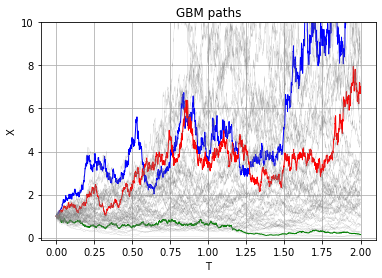

In [292]:
#------------------ The path visualization program ---------------------------------------------------

rng = default_rng()      # instantiate a bit generator

#    Parameters for the OU process being simulated

X0  = 1.     # starting point for simulated paths
a=1
sig=1
dt  = .001     # simulation time step size

PathPlotFile    = "PathPics.pdf"      # filename for a picture of some paths
DensityPlotFile = "GBM_densities.pdf"  # filename for a PDF plots

#   Make a picture with a few paths

n_bold = 3                 # number of bold paths
n_soft = 50                # number of softer paths
T_f    = 2.                # simulate to this "fial" time

fig, ax = plt.subplots()     # Create a figure containing a single axes.

#   generate and plot the bold paths

X,T,Approx,Integral = path_sim( X0, n_bold, dt, T_f, a, sig, rng)

bold_colors = ['blue', 'green', 'red']
for i in range(n_bold):
   ax.plot( T, X[i,:], linewidth = 1, color = bold_colors[i])
   
#   generate and plot the soft paths

X,T,Approx,Integral = path_sim( X0, n_soft, dt, T_f, a, sig, rng)
for i in range(n_soft):
   ax.plot( T, X[i,:], linewidth = .1, color = 'gray')

plt.ylim( -.1, 10)
plt.xlabel("T")
plt.ylabel("X")
title_string = r"GBM paths"
title_string = title_string
plt.title(title_string)
plt.grid()
plt.savefig(PathPlotFile)                                    # save in the same directory
plt.show()

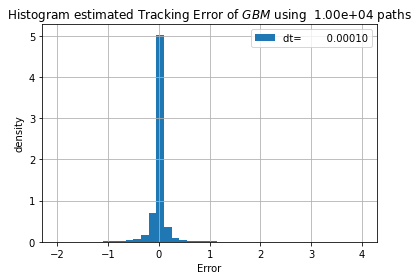

In [293]:
#------------------Main Program—PDF Visualization---------------------------------------------------
fig, ax = plt.subplots()     # Create a figure containing a single axes.

n_hist = 10000
n_bins = 40
X_hist = []
dt2=0.0001
X0=1
T2=1

X,T,Approx,Integral = path_sim( X0, n_hist, dt2, T2, a, sig, rng) # simulation with small Δt
hist2 = "dt={dt3:15.5f}".format(dt3=dt2)

X_hist.append(Approx-Integral)

ax.hist(X_hist, bins = n_bins, range = (X0-3, X0+3), density = True, label = hist2)
ax.legend()
ax.grid()
plt.xlabel("Error")
plt.ylabel("density")
HistTitle = r'Histogram estimated Tracking Error of $GBM$ using{n_hist:10.2e} paths'
HistTitle = HistTitle.format(n_hist=n_hist)
plt.title(HistTitle)
plt.savefig(DensityPlotFile)
plt.show()

In [273]:
#-------------------- The simulator, Create OU paths using EM  --------------------
def path_sim( a, dx, T):
    """Approximate value function V(x)=x^2 with Ornstein Uhlenbeck process using finite difference method
    Arguments
    dx:  (type = float) x step for the simulator
    a:   (type = float) dt=a*dx*dx
    T:   (type = float) final time
    return: (X[:,0],Y) (type = tuple, (np array, np array))
            X = simuated paths, X[:,0] = approximate g(j,0)
            Y = array of j*dx for plotting
    """    
#      adjust dt (make it slightly smaller) to get an integer number of steps
    x= 2/dx
    x= int(x)
    dx= 2/x
    dt = a*dx*dx
    nT = T/dt        #  "number" of time steps, but may not be an integer
    nT = int(nT+1)   #  round up to the nearest integer, the number of time steps
    dt = T/nT        #  adjust the time step down accordingly
    
    T = np.linspace( 0., T, nT+1)             # steps of size dt between 0 and T,
    Y = np.zeros(x+1, np.float64)
    for i in range(x+1):
        Y[i]=i*dx                                        
    X = np.zeros( ( x+1, (nT+1)), np.float64)   #  allocate path array
    for i in range(x):
        X[i,nT] = (i*dx)**2
    for i in range(1,x,1):
        for k in range(nT-1,-1,-1):  # take a time step for all n paths at once
    
           X[i,k] = ((-a)*dx*(-i)*dx+a)/2*X[i-1,k+1] + (1-a)*X[i,k+1] + ((a)*dx*(-i)*dx+a)/2*X[i+1,k+1] #backward equation
       
    return (X[:,0],Y)  

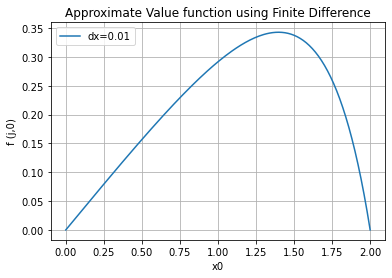

In [307]:
dx=0.01
a=0.8
T=1
X,Y= path_sim(a,dx,T)
fig, ax = plt.subplots()
ax.grid()
label1="dx=0.01"
ax.plot(X,Y,label=label1)
ax.legend()
plt.title("Approximate Value function using Finite Difference")
plt.xlabel("x0")
plt.ylabel("f (j,0)")
plt.show()